In [2]:
import pandas as pd
import numpy as np

In [3]:
# Load the data
df = pd.read_csv('data/wiki_movie_plots_deduped.csv')


In [4]:
# Displaying 10 first columns
df.head(10) # df.head() without argument will display the first 5 rows

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...
5,1903,Alice in Wonderland,American,Cecil Hepworth,May Clark,unknown,https://en.wikipedia.org/wiki/Alice_in_Wonderl...,"Alice follows a large white rabbit down a ""Rab..."
6,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
7,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
8,1905,The Little Train Robbery,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Little_Train...,The opening scene shows the interior of the ro...
9,1905,The Night Before Christmas,American,Edwin Stanton Porter,NaN,unknown,https://en.wikipedia.org/wiki/The_Night_Before...,Scenes are introduced using lines of the poem....


In [5]:
# Displaying the columns
df.columns

Index(['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki Page', 'Plot'],
      dtype='object')

In [6]:
# Displaying the shape of the data (number of rows, number of columns)
df.shape

(34886, 8)

In [7]:
# Displaying the data types of the columns
df.dtypes

Release Year         int64
Title               object
Origin/Ethnicity    object
Director            object
Cast                object
Genre               object
Wiki Page           object
Plot                object
dtype: object

In [8]:
# Displaying the number of unique values in each column
df.nunique()

Release Year          117
Title               32432
Origin/Ethnicity       24
Director            12593
Cast                32182
Genre                2265
Wiki Page           34070
Plot                33869
dtype: int64

In [9]:
# Displaying the number of missing values in each column
df.isnull().sum()

Release Year           0
Title                  0
Origin/Ethnicity       0
Director               0
Cast                1422
Genre                  0
Wiki Page              0
Plot                   0
dtype: int64

In [10]:
# How many unknown director
unknown_director = df['Director'].value_counts()['Unknown']
print(f"There are {unknown_director}/{len(df)} unknown directors.")

There are 1124/34886 unknown directors.


In [11]:
# Most prolific directors
df['Director'].value_counts()

Director
Unknown                1124
Michael Curtiz           79
Hanna-Barbera            77
Lloyd Bacon              66
Jules White              63
                       ... 
Brian Clemens             1
Lester James Peries       1
Maurice Hamblin           1
Trevor Wrenn              1
Ferzan Özpetek            1
Name: count, Length: 12593, dtype: int64

<Axes: xlabel='Release Year'>

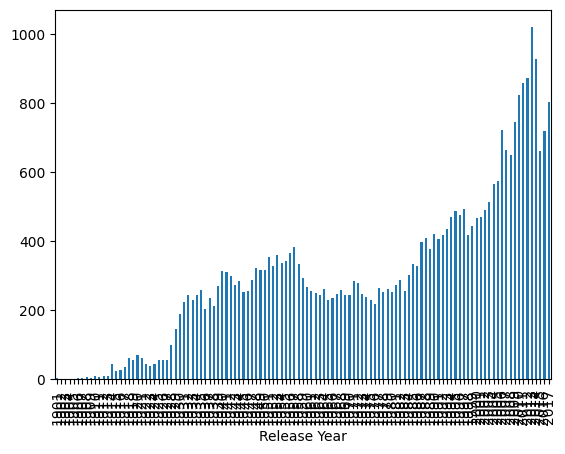

In [12]:
# Distribution by year
df['Release Year'].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='Decade'>

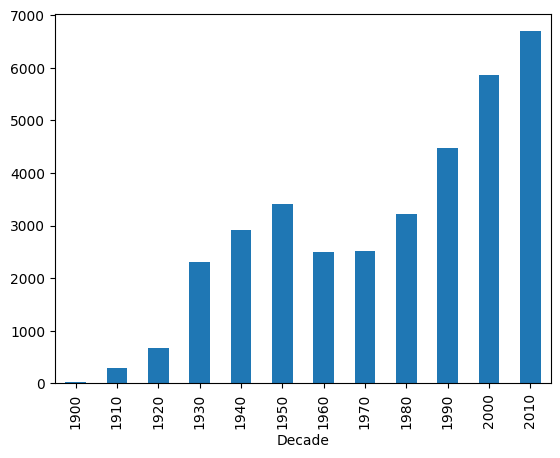

In [13]:
# Distribution by decade
df['Decade'] = df['Release Year'] // 10 * 10
df['Decade'].value_counts().sort_index().plot(kind="bar")

In [14]:
# Most prolific comedy director between 2000 and 2010

# Create a condition to filter movies released between the years 2000 and 2010 (inclusive)
condition_year = df['Release Year'].between(2000, 2010)

# Create a condition to filter movies that have 'comedy' in their genre, case insensitive
condition_comedy = df['Genre'].str.contains('comedy', case=False)

# Apply both conditions to the DataFrame to get movies that are comedies released between 2000 and 2010
comedy_2000_2010 = df[condition_year & condition_comedy]
comedy_2000_2010

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Decade
13592,2000,102 Dalmatians,American,Kevin Lima,"Glenn Close, Gérard Depardieu, Alice Evans","comedy, family",https://en.wikipedia.org/wiki/102_Dalmatians,"After three years in prison, Cruella de Vil ha...",2000
13594,2000,3 Strikes,American,DJ Pooh,"Brian Hooks, N'Bushe Wright",comedy,https://en.wikipedia.org/wiki/3_Strikes_(film),Robert Douglas (Brian Hooks) is in prison for ...,2000
13596,2000,The Adventures of Rocky and Bullwinkle,American,Des McAnuff,"Rene Russo, Jason Alexander, Robert De Niro, P...",comedy,https://en.wikipedia.org/wiki/The_Adventures_o...,35 years since their show's cancellation in 19...,2000
13598,2000,Almost Famous,American,Cameron Crowe,"Billy Crudup, Frances McDormand, Kate Hudson, ...","comedy, drama",https://en.wikipedia.org/wiki/Almost_Famous,"In 1969, child prodigy William Miller struggle...",2000
13599,2000,American Psycho,American,Mary Harron,"Christian Bale, Chloë Sevigny, Willem Dafoe","comedy, thriller",https://en.wikipedia.org/wiki/American_Psycho_...,"In 1987, wealthy New York investment banker Pa...",2000
...,...,...,...,...,...,...,...,...,...
34841,2010,Romantik Komedi,Turkish,Ketche,"Sedef Avcı, Sinem Kobal & Cemal Hünal",comedy,https://en.wikipedia.org/wiki/Romantik_Komedi,"Esra, Didem and Zeynep are three close friends...",2010
34842,2010,Recep İvedik 3,Turkish,Togan Gökbakar,"Şahan Gökbakar, Zeynep Çamcı & Emirhan Çelik",comedy,https://en.wikipedia.org/wiki/Recep_%C4%B0vedik_3,Recep İvedik (Şahan Gökbakar) shows signs of d...,2010
34843,2010,Eyvah Eyvah,Turkish,Hakan Algül,Demet Akbag & Ata Demirer,comedy,https://en.wikipedia.org/wiki/Eyvah_Eyvah,Hüseyin (Ata Demirer) is a young man living wi...,2010
34847,2010,Ay Lav Yu,Turkish,Sermiyan Midyat,"Fadik Sevin Atasoy, Sermiyan Midyat & Steve Gu...",comedy,https://en.wikipedia.org/wiki/Ay_Lav_Yu,"Yusuf Ağa, the landlord of the tiny southeast ...",2010


In [14]:
comedy_2000_2010['Director'].value_counts()

Director
Unknown          14
David Dhawan     10
Priyadarshan     10
Tyler Perry       6
Steve Carr        6
                 ..
Neil Burger       1
Callie Khouri     1
Paul Weiland      1
Yann Samuell      1
Ozan Açıktan      1
Name: count, Length: 1078, dtype: int64

In [15]:
# CAST
# Remove null values
print(f"The length of the dataset before removing null values: {len(df)}")
df = df.dropna(subset=['Cast'])
print(f"The length of the dataset after removing null values: {len(df)}")
df['Cast']

The length of the dataset before removing null values: 34886
The length of the dataset after removing null values: 33464


5                                                May Clark
13                       William Craven, Florence Lawrence
14                                                 Unknown
15                         Bertha Regustus, Edward Boulden
16                       Arthur V. Johnson, Linda Arvidson
                               ...                        
34881    Director: Russell Crowe\r\nCast: Russell Crowe...
34882                            Ahmet Kural, Murat Cemcir
34883                Ata Demirer, Tuvana Türkay, Ülkü Duru
34884    YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...
34885    Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, ...
Name: Cast, Length: 33464, dtype: object

In [16]:
# Remove rows where the 'Cast' column contains 'Unknown'
print(f"The length of the dataset before removing 'Unknown' values: {len(df)}")

# Create a condition to identify rows where the 'Cast' column contains the string 'Unknown', case insensitive
condition = df['Cast'].str.contains('Unknown', case=False)

# Filter the DataFrame to exclude rows where the 'Cast' column contains 'Unknown'
df = df[~condition]
print(f"The length of the dataset after removing 'Unknown' values: {len(df)}")

# Display the 'Cast' column of the filtered DataFrame
df['Cast']

The length of the dataset before removing 'Unknown' values: 33464
The length of the dataset after removing 'Unknown' values: 33463


5                                                May Clark
13                       William Craven, Florence Lawrence
15                         Bertha Regustus, Edward Boulden
16                       Arthur V. Johnson, Linda Arvidson
17                                          D. W. Griffith
                               ...                        
34881    Director: Russell Crowe\r\nCast: Russell Crowe...
34882                            Ahmet Kural, Murat Cemcir
34883                Ata Demirer, Tuvana Türkay, Ülkü Duru
34884    YouTubers Shanna Malcolm, Shira Lazar, Sara Fl...
34885    Halit Ergenç, Tuba Büyüküstün, Mehmet Günsür, ...
Name: Cast, Length: 33463, dtype: object

In [ ]:
# Creating a special function that counts the number of actors in the 'Cast' column
def count_actor(cast):
    return len(cast.split(','))
# Applying the function to the 'Cast' column to create a new column 'nb_actor'
df['nb_actor'] = df['Cast'].apply(count_actor)
df['nb_actor'].head(10).plot(kind="bar")

KeyboardInterrupt: 

In [ ]:
# Checking title duplicates
print(f"Number of duplicate titles: {df['Title'].duplicated().sum()}")
# Removing duplicates: 3 methods :
# keep='first': keep the first occurence
# keep='last': keep the last occurence
# keep=False : remove all duplicates

# We remove the duplicates, that is we remove hte rows where the 'Title' column is duplicated, we keep only the first occurence of each title
df = df.drop_duplicates(subset='Title', keep="first")


652


,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,Decade,nb_actor
16910,2015,The Woman in Black 2: Angel of Death,American,Tom Harper,Phoebe Fox\r\nJeremy Irvine\r\nHelen McCrory\r...,horror,https://en.wikipedia.org/wiki/The_Woman_in_Bla...,Forty years after the events of the first film...,2010,1
16911,2015,Taken 3,American,Olivier Megaton,Liam Neeson\r\nForest Whitaker\r\nFamke Jansse...,action,https://en.wikipedia.org/wiki/Taken_3,Former covert operative Bryan Mills (Liam Nees...,2010,1
16912,2015,Match,American,Stephen Belber,Patrick Stewart\r\nCarla Gugino\r\nMatthew Lil...,drama,https://en.wikipedia.org/wiki/Match_(film),"The film revolves around Tobi, a middle-aged e...",2010,1
16913,2015,Blackhat,American,Michael Mann,Chris Hemsworth\r\nViola Davis\r\nManny Montan...,action,https://en.wikipedia.org/wiki/Blackhat_(film),"At a nuclear plant in Chai Wan, Hong Kong, a h...",2010,1
16914,2015,Little Accidents,American,Sarah Colangelo,Elizabeth Banks\r\nBoyd Holbrook\r\nChloë Sevi...,drama,https://en.wikipedia.org/wiki/Little_Accidents,In a small American town still living in the s...,2010,1
...,...,...,...,...,...,...,...,...,...,...
34739,2015,The Advocate: A Missing Body,South_Korean,Heo Jong-ho,"Lee Sun-kyun, Kim Go-eun",unknown,https://en.wikipedia.org/wiki/The_Advocate:_A_...,Byeon Ho-sung is a hotshot lawyer at a big law...,2010,2
34740,2015,Collective Invention,South_Korean,Kwon Oh-kwang,"Lee Kwang-soo, Park Bo-young, Lee Chun-hee",unknown,https://en.wikipedia.org/wiki/Collective_Inven...,A medical experiment gone wrong and a man muta...,2010,3
34741,2015,The Priests,South_Korean,Jang Jae-hyun,"Kim Yoon-seok, Kang Dong-won",unknown,https://en.wikipedia.org/wiki/The_Priests_(film),A young girl who belongs to Father Kim's paris...,2010,2
34742,2015,Inside Men,South_Korean,Woo Min-ho,"Lee Byung-hun, Jo Seung-woo",unknown,https://en.wikipedia.org/wiki/Inside_Men_(film),"Lee Kang-hee, an editor at an influential cons...",2010,2
